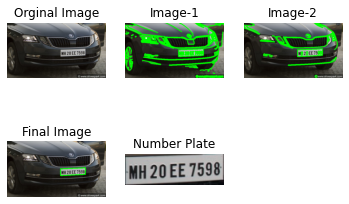

Number is: MH 20 EE 7598



In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import skimage.io as io
import imutils
import numpy as np
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'


img = io.imread('2.png')
og = io.imread('2.png')
img = imutils.resize(img, width=500 )
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #convert to grey scale
gray = cv.bilateralFilter(gray, 11, 17, 17) #Blur to reduce noise
edged = cv.Canny(gray, 30, 200) #Perform Edge detection
cnts,new = cv.findContours(edged.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)


img1=img.copy()
cv.drawContours(img1,cnts,-1,(0,255,0),3)
#cv.imshow("img1",img1)
cnts = sorted(cnts, key = cv.contourArea, reverse = True)[:30]
screenCnt = None #will store the number plate contour
img2 = img.copy()
cv.drawContours(img2,cnts,-1,(0,255,0),3) 
#cv.imshow("img2",img2) #top 30 contours


count=0
idx=7
# loop over contours
for c in cnts:
  # approximate the contour
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.018 * peri, True)
        if len(approx) == 4: #chooses contours with 4 corners
                screenCnt = approx
                x,y,w,h = cv.boundingRect(c) #finds co-ordinates of the plate
                new_img=img[y:y+h,x:x+w]
                cv.imwrite('./'+str(idx)+'.png',new_img) #stores the new image
                idx+=1
                break
            #draws the selected contour on original image        
cv.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)
#cv.imshow("Final image with plate detected",img)

Cropped_loc='./7.png' #the filename of cropped image
#cv.imshow("cropped",cv.imread(Cropped_loc))



t=["Orginal Image","Image-1","Image-2","Final Image","Number Plate"]
im=[og,img1,img2,img,io.imread(Cropped_loc)]
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.title(t[i])
    plt.imshow(im[i])
    plt.axis('off')
plt.show()

pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe" #exe file for using ocr 

text=pytesseract.image_to_string(Cropped_loc,lang='eng') #converts image characters to string
print("Number is:" ,text)
cv.waitKey(0)
cv.destroyAllWindows() 
